<a href="https://colab.research.google.com/github/ekanshsinghrathore/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
# importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# attaching csv file to this
df = pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls')

In [4]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
# setting column header for our dataframe
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header

In [7]:
# checking dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# checking datatypes of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [9]:
# as we can see from above all data is in object datatype
df = df.astype('int')

In [10]:
# we can see now datatype converted to integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [13]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [14]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [15]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [16]:
# changing columns names
df = df.rename(columns={'default payment next month': 'def_pay', 'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


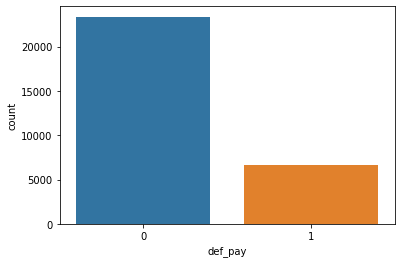

In [17]:
# now checking default payments , 1 means yes and 0 means no
sns.countplot(x ='def_pay', data = df)
plt.show()

In [18]:
df.def_pay.value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

In [19]:
# Plotting graph for the male and females present in the data
df2=df.copy()
def sex1(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
df2['SEX']=df['SEX'].apply(sex1)

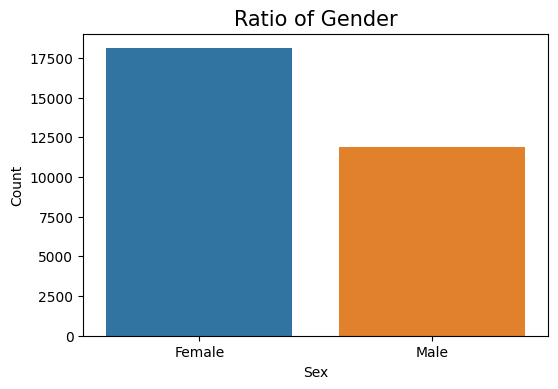

In [20]:
plt.figure(dpi=100)
df2.SEX.value_counts()
sns.countplot(x="SEX", data=df2)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [21]:
# plotting graph for various qualification present in the dataset
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
df2['EDUCATION']=df2['EDUCATION'].apply(edu1)

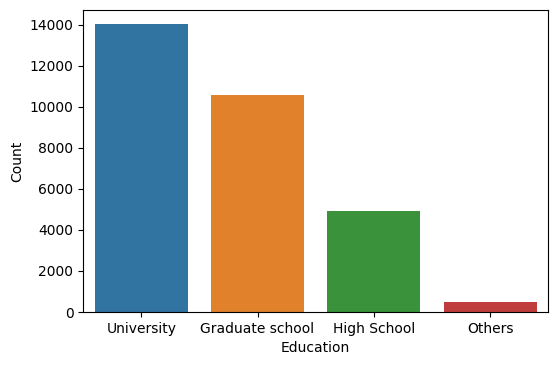

In [22]:
plt.figure(dpi=100)
df2.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", data=df2)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

In [23]:
# plotting graph to findout marriage status of records
def marriage1(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
df2['MARRIAGE']=df2['MARRIAGE'].apply(marriage1)

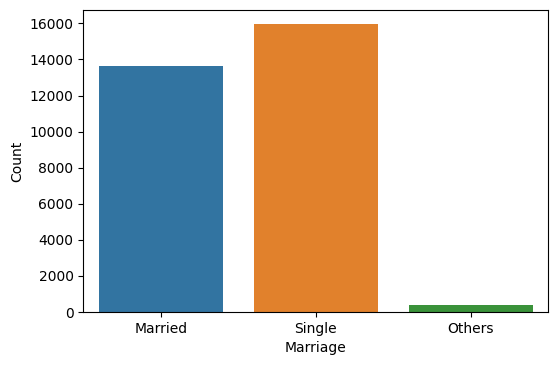

In [24]:
plt.figure(dpi=100)
df2.MARRIAGE.value_counts()
sns.countplot(x="MARRIAGE",  data=df2)
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.show()

In [25]:
# def_pay being the target variable lets found out its correlation with other feautures
cor = df.corr()
cor_target = abs(cor["def_pay"])
cor_target

0
ID           0.013952
LIMIT_BAL    0.153520
SEX          0.039961
EDUCATION    0.028006
MARRIAGE     0.024339
AGE          0.013890
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1    0.019644
BILL_AMT2    0.014193
BILL_AMT3    0.014076
BILL_AMT4    0.010156
BILL_AMT5    0.006760
BILL_AMT6    0.005372
PAY_AMT1     0.072929
PAY_AMT2     0.058579
PAY_AMT3     0.056250
PAY_AMT4     0.056827
PAY_AMT5     0.055124
PAY_AMT6     0.053183
def_pay      1.000000
Name: def_pay, dtype: float64

In [26]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

0
LIMIT_BAL    0.153520
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
PAY_AMT1     0.072929
PAY_AMT2     0.058579
PAY_AMT3     0.056250
PAY_AMT4     0.056827
PAY_AMT5     0.055124
PAY_AMT6     0.053183
def_pay      1.000000
Name: def_pay, dtype: float64

In [27]:
# checking the null values
df.isnull().sum(axis=0)

0
ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

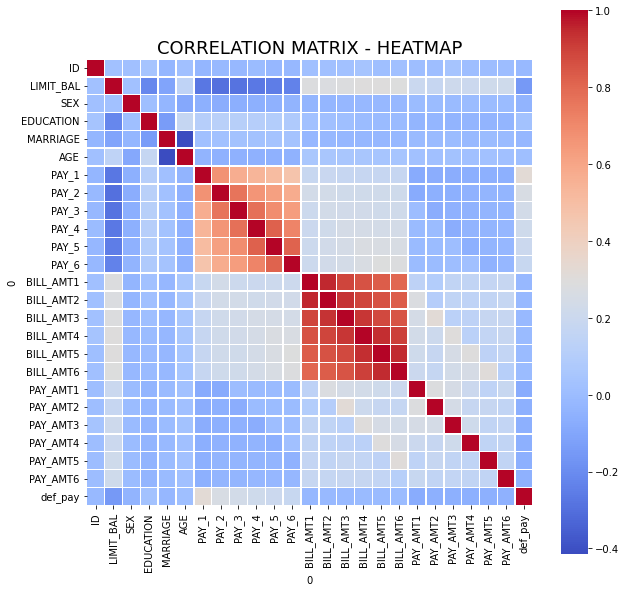

In [28]:
#  looking at correlations matrix, defined via Pearson function  
corr = df.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

# Applying Algorithms for getting best model

In [40]:
from sklearn.model_selection import train_test_split

In [29]:
independent_variables = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [30]:
dependent_variables = ['def_pay']

In [31]:
# storing values in X and y of both types of variables
X = df[independent_variables].values

y = df[dependent_variables].values

In [41]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Now using decesion tree classifier

In [42]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [43]:
# calling algorithm
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 

In [44]:
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)

In [45]:
# see how good we did on the test
cm = confusion_matrix( y_test, predictions )
print("Accuracy on Test Set for Decesion Tree Classifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for Decesion Tree Classifier = 0.80


# Random Forest Classifier

In [66]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
# fitting algorithm
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_pred_rfc = classifier.predict( X_test )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
cm = confusion_matrix( y_test, y_pred_rfc )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for RandomForest = 0.81


# Support Vector Machine

In [48]:
# importing svm
from sklearn.svm import SVC

In [49]:
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_train, y_train )
y_pred_svm = classifier1.predict( X_test )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
cm = confusion_matrix( y_test, y_pred_svm )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for kernel-SVM = 0.77


# Logistic Regression

In [51]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [52]:
# fitting losgistic regression on data
classifier2 = LogisticRegression()
classifier2.fit( X_train, y_train )
y_pred_lr = classifier2.predict( X_test )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [53]:
cm = confusion_matrix( y_test, y_pred_lr )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for LogReg = 0.77


# Naive Bayes 

In [54]:
# Importing Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

In [55]:
# Fitting 
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_pred_nbc = classifier3.predict( X_test )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
cm = confusion_matrix( y_test, y_pred_nbc )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for NBClassifier = 0.39


# K-Neighbours

In [57]:
# importing knn
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# fitting data into algo
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_pred_knn = classifier4.predict( X_test )

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [59]:
cm = confusion_matrix( y_test, y_pred_knn )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for KNeighborsClassifier = 0.75


# As we can see from above Accuracies of our model, we can easily figure our that decesion tree classifier and support vectore machine working equally on this.

# so we will further deep dive into hyper parameters of decesion tree classifier to get more highly accurated results

# Decesion Tree Classifier Tuning Hyperparameters

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [62]:
cm = confusion_matrix( y_test, predictions )
print("Accuracy on Test Set for Decesion Tree Classifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

Accuracy on Test Set for Decesion Tree Classifier = 0.80


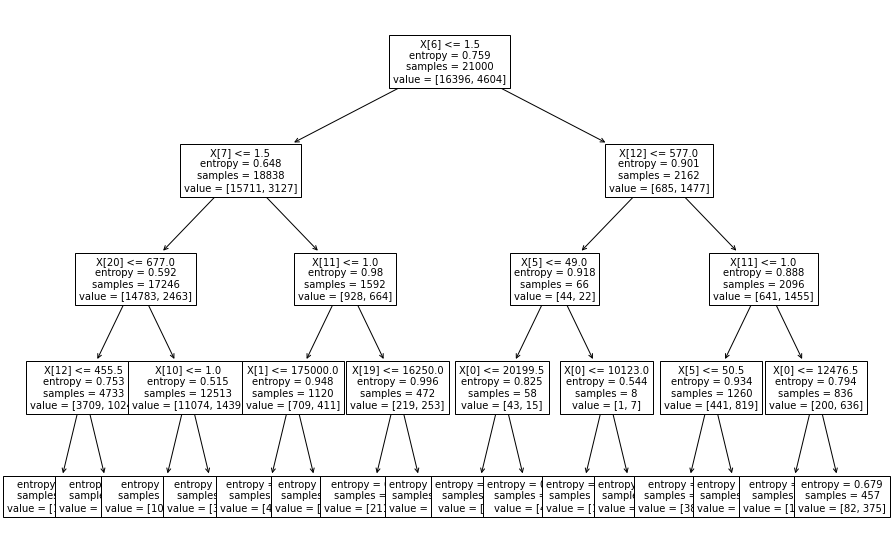

In [63]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=5)
clf_tree.fit(X_train, y_train)
clf_tree_pred=clf_tree.predict(X_test)
#
# Plot the decision tree
#
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


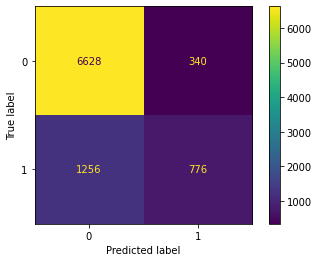

In [64]:
plot_confusion_matrix(clf_tree, X_test, y_test)  
plt.show()

# By tuning our hyperparameter we are alble to increase our accuracy by 1% in decesion tree classifier

In [75]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_rfc, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_svm, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_lr, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_nbc, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_pred_knn, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

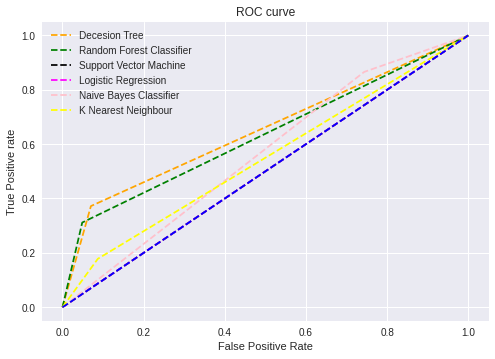

In [79]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decesion Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(fpr4, tpr4, linestyle='--',color='magenta', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Naive Bayes Classifier')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='K Nearest Neighbour')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [87]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, predictions)
auc_score2 = roc_auc_score(y_test, y_pred_rfc)
auc_score3 = roc_auc_score(y_test, y_pred_svm)
auc_score4 = roc_auc_score(y_test, y_pred_lr)
auc_score5 = roc_auc_score(y_test, y_pred_nbc)
auc_score6 = roc_auc_score(y_test, y_pred_knn)

print(f'Decesion Tree AUC Score is {auc_score1} \n Random Forest Classifier AUC Score is {auc_score2}\n Support Vector Machine AUC Score is {auc_score3}\n Logistic Regression Classification AUC Score is {auc_score4}\n Naive Bayes Classifier AUC Score is {auc_score5}\n K-Nearest Neighbour AUC Score is {auc_score6}')

Decesion Tree AUC Score is 0.6510064004628584 
 Random Forest Classifier AUC Score is 0.6314323860708572
 Support Vector Machine AUC Score is 0.5
 Logistic Regression Classification AUC Score is 0.5000307931873039
 Naive Bayes Classifier AUC Score is 0.5611256068235443
 K-Nearest Neighbour AUC Score is 0.5455185459739461
